In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import datetime 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from patsy import dmatrices

In [2]:
# had to pip install openpyxl
df_data = pd.read_excel('airlines.xlsx')
df_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
#Clean data
df_data = df_data.dropna(axis=0, ignore_index=True)
print(df_data)

           Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10677     Air Asia       9/04/2019   Kolkata    Banglore   
10678    Air India      27/04/2019   Kolkata    Banglore   
10679  Jet Airways      27/04/2019  Banglore       Delhi   
10680      Vistara      01/03/2019  Banglore   New Delhi   
10681    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun

In [4]:
#Check for NaN: True if NaN present, False if not 
df_data.isnull().values.any()

False

In [5]:
#Convert Date and Time Strings to Datetime objects 
df_data["Date_of_Journey"] = pd.to_datetime(df_data["Date_of_Journey"])
df_data['Dep_Time'] = pd.to_datetime(df_data['Dep_Time']).dt.time
df_data['Arrival_Time'] = pd.to_datetime(df_data['Arrival_Time']).dt.time
print(df_data)

           Airline Date_of_Journey    Source Destination  \
0           IndiGo      2019-03-24  Banglore   New Delhi   
1        Air India      2019-05-01   Kolkata    Banglore   
2      Jet Airways      2019-06-09     Delhi      Cochin   
3           IndiGo      2019-05-12   Kolkata    Banglore   
4           IndiGo      2019-03-01  Banglore   New Delhi   
...            ...             ...       ...         ...   
10677     Air Asia      2019-04-09   Kolkata    Banglore   
10678    Air India      2019-04-27   Kolkata    Banglore   
10679  Jet Airways      2019-04-27  Banglore       Delhi   
10680      Vistara      2019-03-01  Banglore   New Delhi   
10681    Air India      2019-05-09     Delhi      Cochin   

                       Route  Dep_Time Arrival_Time Duration Total_Stops  \
0                  BLR → DEL  22:20:00     01:10:00   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR  05:50:00     13:15:00   7h 25m     2 stops   
2      DEL → LKO → BOM → COK  09:25:00     04:25:00

/var/folders/hk/v0tdsb_177zc12zhb6c9tdsc0000gn/T/ipykernel_93636/3989470375.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_data["Date_of_Journey"] = pd.to_datetime(df_data["Date_of_Journey"])
/var/folders/hk/v0tdsb_177zc12zhb6c9tdsc0000gn/T/ipykernel_93636/3989470375.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_data['Dep_Time'] = pd.to_datetime(df_data['Dep_Time']).dt.time
/var/folders/hk/v0tdsb_177zc12zhb6c9tdsc0000gn/T/ipykernel_93636/3989470375.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_data['Arrival_Time'] = pd.to_datetime(df_data['Arrival_Time']).dt.time


In [6]:
""" 
Add the following columns to df_data: 
'Journey_day', 'Journey_month', 'Journey_year', 'Dep_Time_hour', 
'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute' and fill it with the corresponding data.
"""

df_data['Journey_day'] = df_data['Date_of_Journey'].dt.day
df_data['Journey_month'] = df_data['Date_of_Journey'].dt.month
df_data['Journey_year'] = df_data['Date_of_Journey'].dt.year
df_data['Dep_Time_hour'] = df_data['Dep_Time'].apply(lambda x: x.hour)
df_data['Dep_Time_minute'] = df_data['Dep_Time'].apply(lambda x: x.minute)
df_data['Arrival_Time_hour'] = df_data['Arrival_Time'].apply(lambda x: x.hour)
df_data['Arrival_Time_minute'] = df_data['Arrival_Time'].apply(lambda x: x.minute)




In [8]:
def dep_description(hour):
    if 4 <= hour < 8:
        return "Early Morning"
    elif 8 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 16:
        return "Noon"
    elif 16 <= hour < 20:
        return "Evening"
    elif 20 <= hour < 24:
        return "Night"
    else:
        return "Late Night"
    
df_data['dep_description'] = df_data['Dep_Time_hour'].apply(dep_description)
df_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,dep_description
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,Night
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,Early Morning
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,Morning
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,Evening
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,Evening


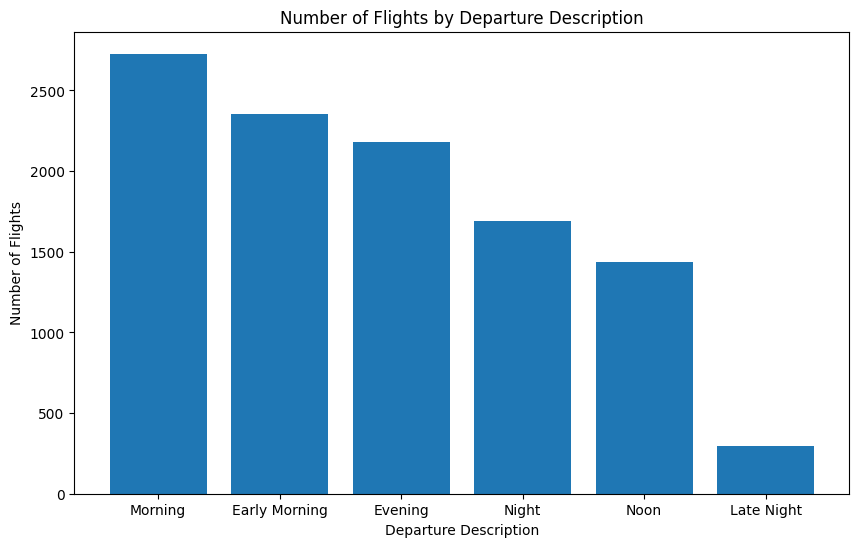

In [9]:

#y-axis data
dep_description_counts = df_data['dep_description'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(dep_description_counts.index, dep_description_counts.values)
plt.xlabel('Departure Description')
plt.ylabel('Number of Flights')
plt.title('Number of Flights by Departure Description')
plt.show()

In [10]:
df_data['Duration_hours'] = pd.to_timedelta(df_data['Duration']).dt.components['hours']
df_data['Duration_mins'] = pd.to_timedelta(df_data['Duration']).dt.components['minutes']
df_data['Duration_total_mins'] = (df_data['Duration_hours'] * 60) + df_data['Duration_mins']


df_data.head()



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,dep_description,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,2h 50m,non-stop,No info,...,3,2019,22,20,1,10,Night,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,7h 25m,2 stops,No info,...,5,2019,5,50,13,15,Early Morning,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19h,2 stops,No info,...,6,2019,9,25,4,25,Morning,19,0,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,5h 25m,1 stop,No info,...,5,2019,18,5,23,30,Evening,5,25,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,4h 45m,1 stop,No info,...,3,2019,16,50,21,35,Evening,4,45,285


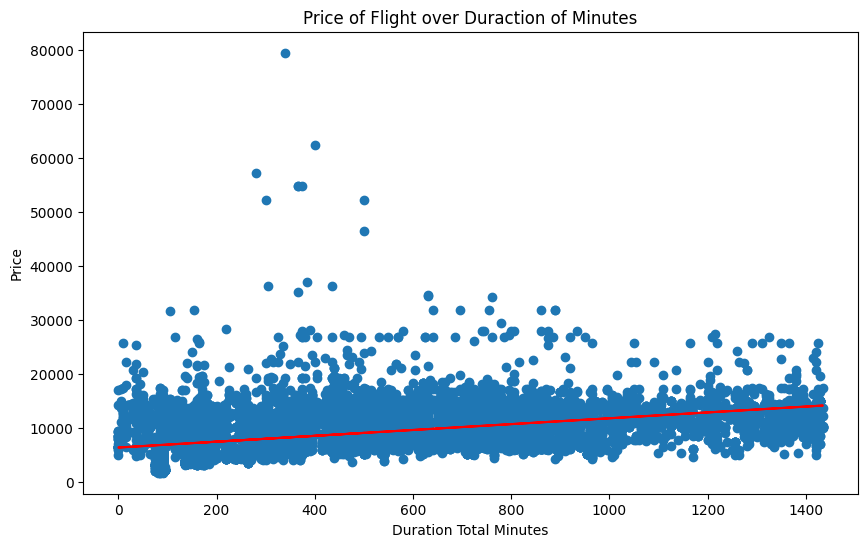

In [11]:

slope, intercept = numpy.polyfit(df_data['Duration_total_mins'], df_data['Price'], 1)

plt.figure(figsize=(10, 6))
plt.scatter(df_data['Duration_total_mins'], df_data['Price'])

regression_line = slope * df_data['Duration_total_mins'] + intercept
plt.plot(df_data['Duration_total_mins'], regression_line, color='red')

plt.xlabel('Duration Total Minutes')
plt.ylabel('Price')
plt.title('Price of Flight over Duraction of Minutes')
plt.show()

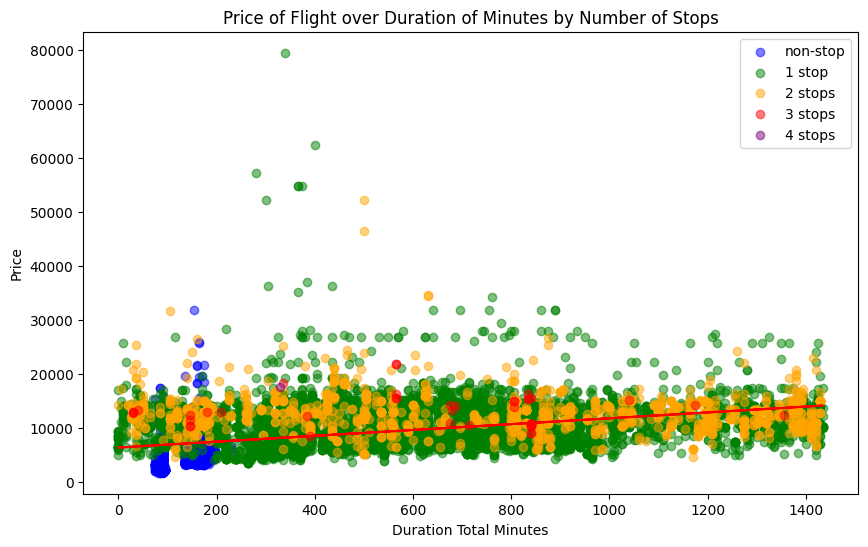

In [12]:
slope, intercept = numpy.polyfit(df_data['Duration_total_mins'], df_data['Price'], 1)


#define color code for stops
stops_color_map = {
    'non-stop': 'blue',
    '1 stop': 'green',
    '2 stops': 'orange',
    '3 stops': 'red',
    '4 stops': 'purple'
}


plt.figure(figsize=(10, 6))
for stop_type, color in stops_color_map.items():
    subset = df_data[df_data['Total_Stops'] == stop_type]
    plt.scatter(subset['Duration_total_mins'], subset['Price'], color=color, label=stop_type, alpha=0.5)

regression_line = slope * df_data['Duration_total_mins'] + intercept
plt.plot(df_data['Duration_total_mins'], regression_line, color='red')
plt.xlabel('Duration Total Minutes')
plt.ylabel('Price')
plt.title('Price of Flight over Duration of Minutes by Number of Stops')
plt.legend()
plt.show()

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
Name: count, dtype: int64


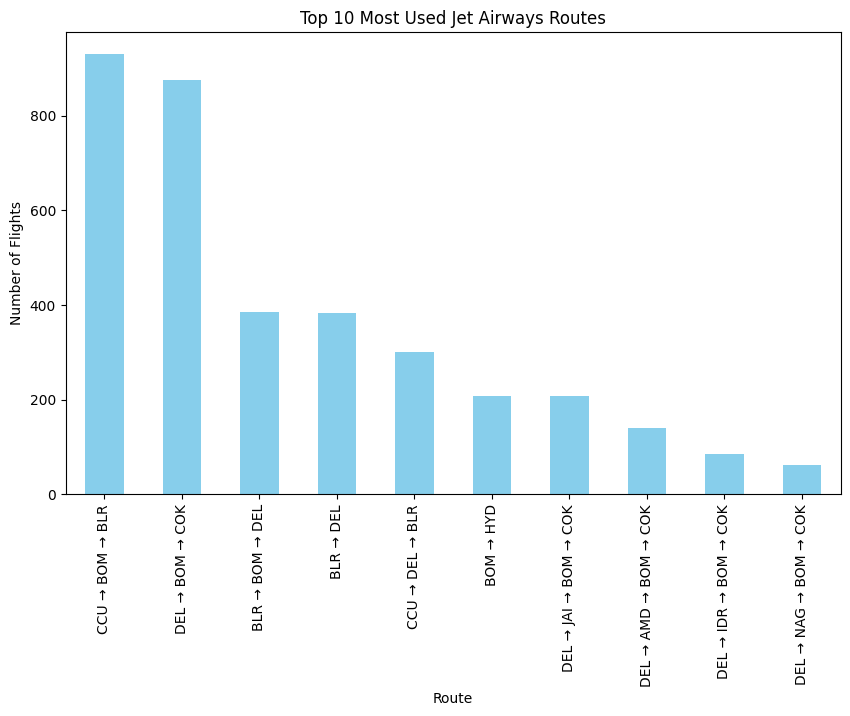

In [13]:
route_counts = df_data[df_data['Airline'] == 'Jet Airways']['Route'].value_counts().head(10)
print(route_counts)

plt.figure(figsize=(10, 6))
route_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Route')
plt.ylabel('Number of Flights')
plt.title('Top 10 Most Used Jet Airways Routes')
plt.show()


# As indicated by the graph and the dataframe head below, the most used route by Jet Airways is the route: CCU → BOM → BLR with 930 occurences 


In [14]:
y, X = dmatrices('Price ~ Duration_total_mins - 1', df_data, return_type='dataframe')

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

len(x_train), len(y_train), len(x_test), len(y_test)

model_duration_price = LinearRegression()
model_duration_price.fit(x_train, y_train)

y_pred = model_duration_price.predict(x_test)
print("R-squared:", model_duration_price.score(x_train, y_train))

#The relatively low R^2 score indicates that there is low correlation between the factors listed in the above matrices

R-squared: 0.2005585827171643


In [72]:
y, X = dmatrices('Price ~ Airline * Source * Destination * Total_Stops * Journey_month * Journey_day', df_data, return_type='dataframe')

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model_price = LinearRegression()
model_price.fit(x_train, y_train)


y_pred = model_price.predict(x_test)
r2_score = model_price.score(x_test, y_test)

print("R-squared score:", r2_score)

#Terrible R score, almost no valid conclusions can be drawn from this; 5 minute + run time and R score of -6 * 10^18

In [17]:
y, X = dmatrices('Price ~ Total_Stops', df_data, return_type='dataframe')

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model_price = LinearRegression()
model_price.fit(x_train, y_train)


y_pred = model_price.predict(x_test)
r2_score = model_price.score(x_test, y_test)

print("R-squared score:", r2_score)

#When comparing price with total stops, an R^2 score of around 0.4 isn't a clear relationship, but still better than previous models

R-squared score: 0.3953695239101138


In [18]:
y, X = dmatrices('Price ~ Journey_month * Journey_day', df_data, return_type='dataframe')

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model_price = LinearRegression()
model_price.fit(x_train, y_train)


y_pred = model_price.predict(x_test)
r2_score = model_price.score(x_test, y_test)

print("R-squared score:", r2_score)

#This model shows a very good relationship and is an indicator that the price of the trip is directly related to the day of the trip which makes sense (holiday prices are higher than normal prices )

R-squared score: 0.07497395550468011
